# Workbench to Analyse the Algorithm's Performance

---

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
from aegomoku.gomoku_players import PolicyAdvisedGraphSearchPlayer
from aegomoku.interfaces import MctsParams, PolicyParams
from aegomoku.gomoku_game import GomokuGame
from aegomoku.gomoku_board import GomokuBoard
from aegomoku.utils import analyse_board

from setup_local import DATA_PATH

In [4]:
BOARD_SIZE = 19

In [5]:
def get_player(model_name, num_simus, gamma):
    game = GomokuGame(board_size=BOARD_SIZE)

    if model_name is not None:
        model_file = DATA_PATH / 'models' / model_name
    else:
        model_file = None
    mcts_params = MctsParams(cpuct=1.0, temperature=0, num_simulations=num_simus, gamma=gamma)
    policy_params = PolicyParams(model_file_name=model_file, advice_cutoff=0.01) if model_file else None
    return PolicyAdvisedGraphSearchPlayer(model_name, game, mcts_params, policy_params)

In [6]:
MODEL_0 = None
MODEL_1 = '1_c3.model'
MODEL_2 = '2_c1.model'
MODEL_3 = '3_c2.model'
MODEL_4 = '4_c2s.model'

In [7]:
stones='J10K9K11I9L10J9L9J8K7I8I10H9G9K10H7'

Metal device set to: Apple M1 Max


2022-10-22 14:02:53.927282: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-22 14:02:53.927413: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Next best by advice   : (L11, 163)
Next best by MCTS prob: (L11, 163)
Next best by MCTS QVal: (L11, 163)


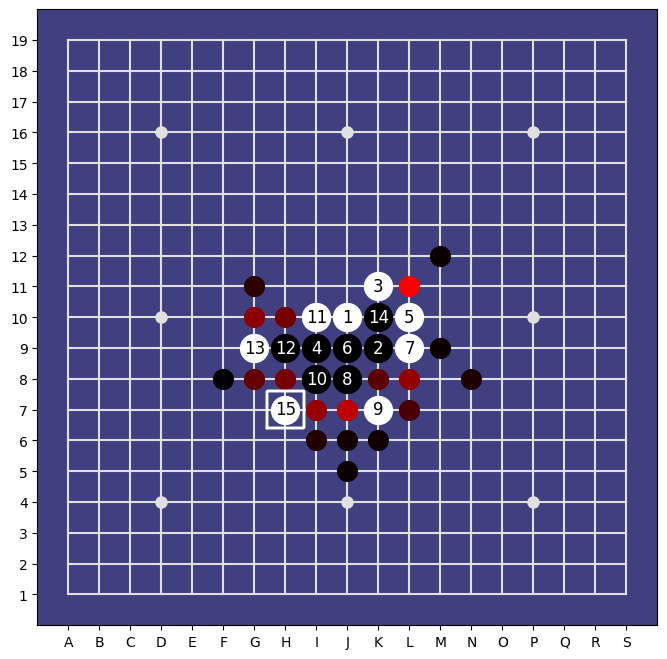

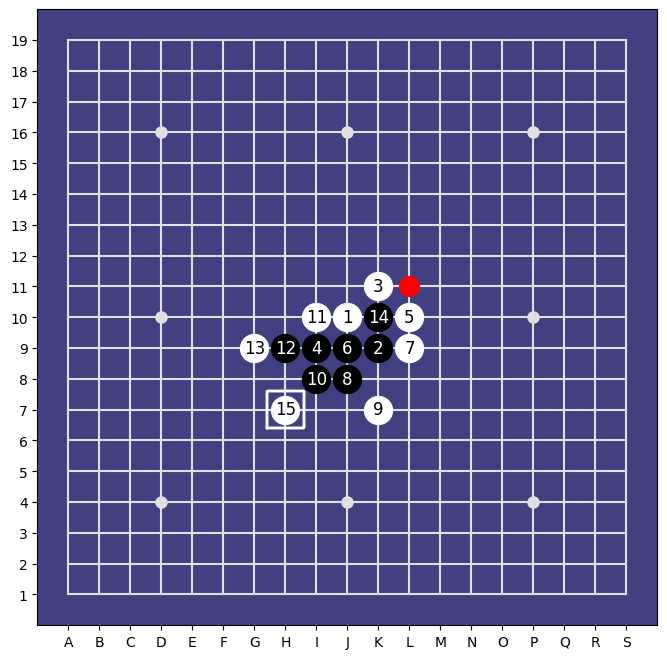

In [8]:
def scrutinize(board_size, stones, model, num_simus, gamma, disp_width):
    board = GomokuBoard(board_size, stones=stones)
    player = get_player(model, num_simus, gamma)
    analyse_board(board_size, stones, player.adviser, disp_width=disp_width)

    advice = player.adviser.advise(board.canonical_representation())
    move = np.where(advice == max(advice))[0][0]
    print(f"Next best by advice   : {board.Stone(move), move}")

    probs = player.mcts.get_action_prob(board, temperature=0.2)
    analyse_board(board_size, stones, probs, disp_width=disp_width, policy_cutoff=.001)
    move = np.where(probs == np.max(probs, axis=None))[0][0]
    print(f"Next best by MCTS prob: {board.Stone(move), move}")

    qs = [player.mcts.Q.get((board.get_string_representation(), i), -1) for i in range(BOARD_SIZE**2)]
    player.mcts.Q.get((board.get_string_representation(), int(move)), 0)
    move = np.where(np.array(qs) == np.max(np.array(qs), axis=None))[0][0]
    print(f"Next best by MCTS QVal: {board.Stone(move), move}")
    return player.mcts

mcts = scrutinize(BOARD_SIZE, stones, MODEL_4, 400, 0.97, 8)

## Navigate a couple of moves aheead

In [58]:
board = GomokuBoard(BOARD_SIZE, stones=stones)
board.plot()

s = board.get_string_representation()
move = mcts.best_act(board, s, mcts.probable_actions(board))
move

                                                                 
19    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
18    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
17    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
16    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
15    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
14    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
13    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
12    .  .  .  .  .  .  .  .  .  .  .  O  .  .  .  .  .  .  .    
11    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
10    .  .  .  .  .  .  .  O  .  X  .  .  .  .  .  .  .  .  .    
 9    .  .  .  .  .  .  O  .  X  O  O  .  .  .  .  .  .  .  .    
 8    .  .  .  .  .  .  .  X  X  X  O  .  .  .  .  .  .  .  .    
 7    .  .  .  .  .  .  O  .  X  X  .  .  .  .  .  .  .  .  .    
 6    .  .  .  .  .  .  .  .  O  X  .  .  .  .  .  .  .  .  .    
 5    .  .

In [60]:
board.act(move)
board.plot()
s = board.get_string_representation()
move = mcts.best_act(board, s, mcts.probable_actions(board))
move

                                                                 
19    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
18    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
17    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
16    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
15    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
14    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
13    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
12    .  .  .  .  .  .  .  .  .  .  .  O  .  .  .  .  .  .  .    
11    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
10    .  .  .  .  .  .  .  O  .  X  .  .  .  .  .  .  .  .  .    
 9    .  .  .  .  .  .  O  .  X  O  O  .  .  .  .  .  .  .  .    
 8    .  .  .  .  .  .  .  X  X  X  O  .  .  .  .  .  .  .  .    
 7    .  .  .  .  .  .  O  .  X  X  .  .  .  .  .  .  .  .  .    
 6    .  .  .  .  .  .  .  .  O  X  .  .  .  .  .  .  .  .  .    
 5    .  .

K4

In [61]:
from aegomoku.constants_19x19 import *

In [62]:
board.act(L5)

... J7 J9 K5 L4 J5 J4 I5 L5 (Black next)

In [63]:
board.plot()
s = board.get_string_representation()
move = mcts.best_act(board, s, mcts.probable_actions(board))
move

                                                                 
19    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
18    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
17    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
16    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
15    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
14    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
13    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
12    .  .  .  .  .  .  .  .  .  .  .  O  .  .  .  .  .  .  .    
11    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
10    .  .  .  .  .  .  .  O  .  X  .  .  .  .  .  .  .  .  .    
 9    .  .  .  .  .  .  O  .  X  O  O  .  .  .  .  .  .  .  .    
 8    .  .  .  .  .  .  .  X  X  X  O  .  .  .  .  .  .  .  .    
 7    .  .  .  .  .  .  O  .  X  X  .  .  .  .  .  .  .  .  .    
 6    .  .  .  .  .  .  .  .  O  X  .  .  .  .  .  .  .  .  .    
 5    .  .

L8